# Importing Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras 


# Loading data 

In [2]:
df=pd.read_csv('/kaggle/input/bank-customers/Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 14)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [8]:
df.columns.values

array(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'], dtype=object)

# Data Manipulation

In [9]:
df.drop('CustomerId',axis='columns',inplace=True)


In [10]:
df.drop('RowNumber',axis='columns',inplace=True)

In [11]:
df.drop('Surname',axis='columns',inplace=True)

In [12]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [13]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

# Data Visualisation

In [14]:
numeric_features=['CreditScore','Age', 'Tenure', 'Balance', 'NumOfProducts','EstimatedSalary']
df[numeric_features].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,100090.239881
std,96.653299,10.487806,2.892174,62397.405202,0.581654,57510.492818
min,350.000000,18.000000,0.000000,0.000000,1.000000,11.580000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,51002.110000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,100193.915000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,149388.247500
max,850.000000,92.000000,10.000000,250898.090000,4.000000,199992.480000


Visualising Churn

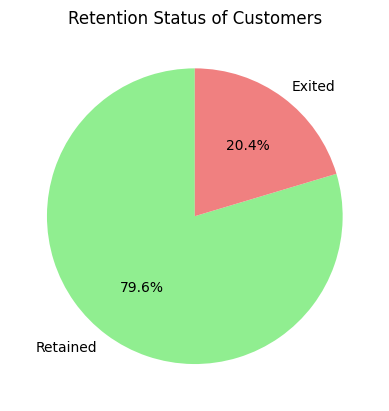

In [15]:
customer_counts = df['Exited'].value_counts()
labels = ['Retained', 'Exited']
colors = ['lightgreen', 'lightcoral']
plt.pie(customer_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Retention Status of Customers')
plt.show()

Churn wrt gender and geography

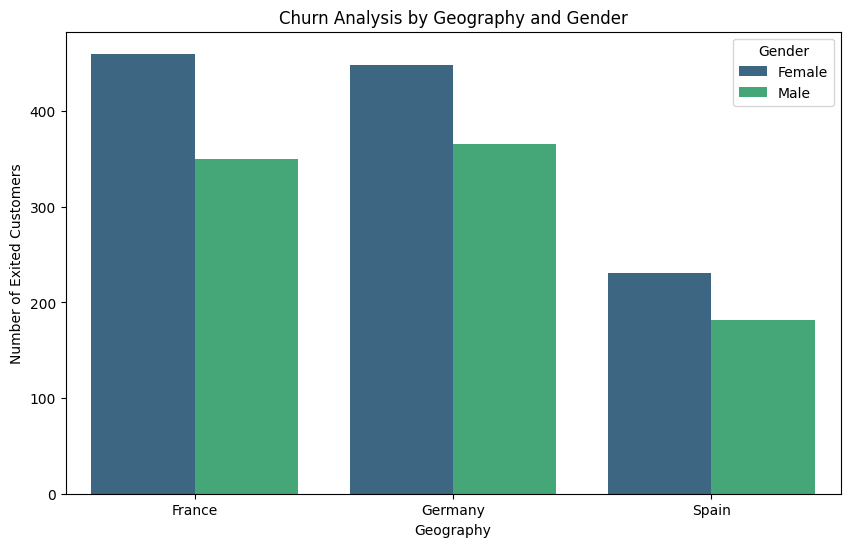

In [16]:
churn_data = df.groupby(['Geography', 'Gender'])['Exited'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Geography', y='Exited', hue='Gender', data=churn_data, palette='viridis')
plt.title('Churn Analysis by Geography and Gender')
plt.xlabel('Geography')
plt.ylabel('Number of Exited Customers')
plt.show()

Churn wrt tenure

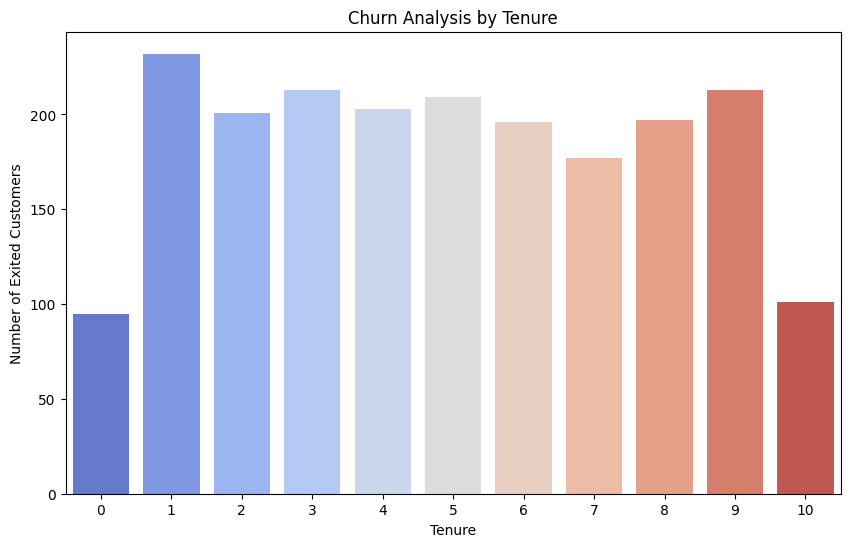

In [17]:
churn_data = df.groupby('Tenure')['Exited'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='Tenure', y='Exited', data=churn_data, palette='coolwarm')
plt.title('Churn Analysis by Tenure')
plt.xlabel('Tenure')
plt.ylabel('Number of Exited Customers')
plt.show()

Churn wrt age 

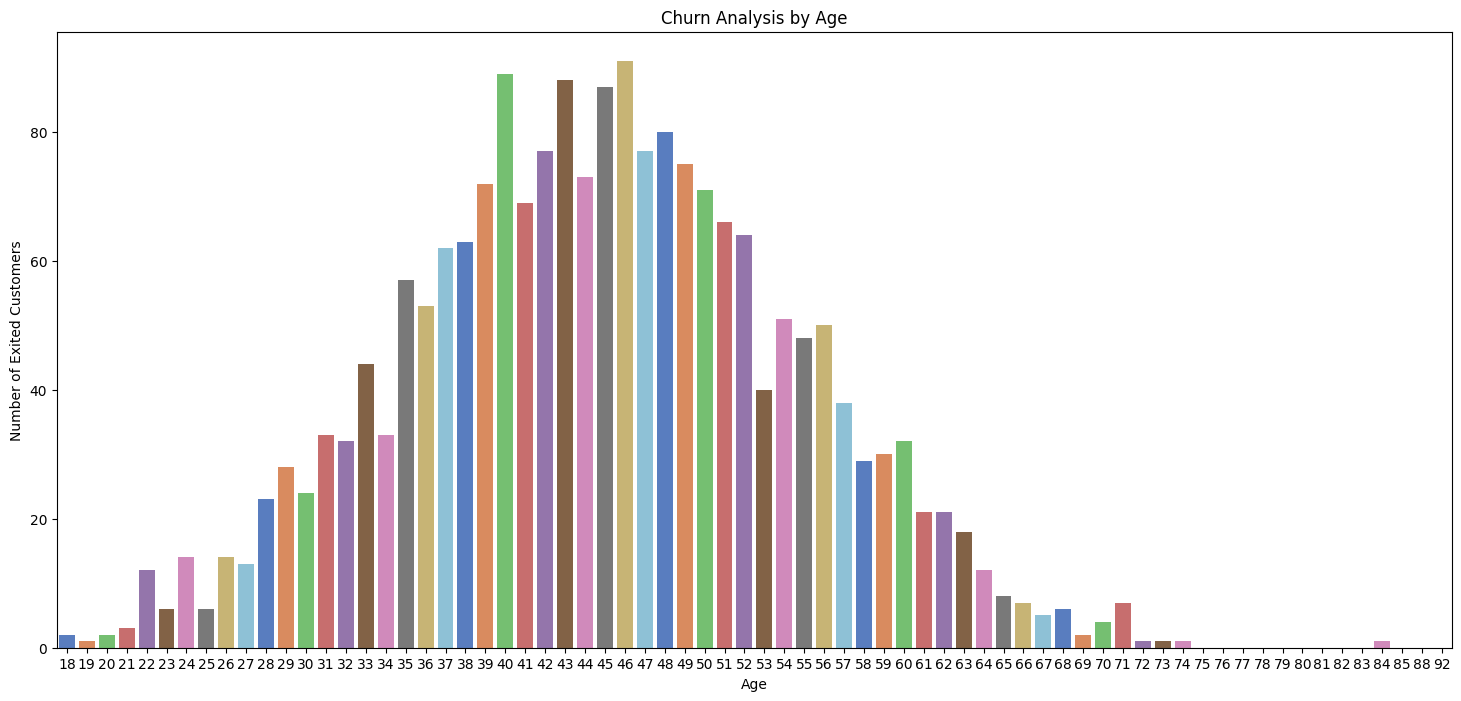

In [18]:
churn_data = df.groupby('Age')['Exited'].sum().reset_index()
plt.figure(figsize=(18, 8))
sns.barplot(x='Age', y='Exited', data=churn_data, palette='muted')
plt.title('Churn Analysis by Age')
plt.xlabel('Age')
plt.ylabel('Number of Exited Customers')
plt.show()

# Encoding

In [19]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder_geography = LabelEncoder()
df['Geography'] = label_encoder_geography.fit_transform(df['Geography'])

label_encoder_gender = LabelEncoder()
df['Gender'] = label_encoder_gender.fit_transform(df['Gender'])

In [21]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


In [22]:
geography_mapping = dict(zip(label_encoder_geography.classes_, label_encoder_geography.transform(label_encoder_geography.classes_)))
geography_mapping

{'France': 0, 'Germany': 1, 'Spain': 2}

In [23]:
gender_mapping = dict(zip(label_encoder_gender.classes_, label_encoder_gender.transform(label_encoder_gender.classes_)))
gender_mapping 

{'Female': 0, 'Male': 1}

In [24]:
x=df.drop('Exited',axis='columns')
x.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10


In [25]:
y=df['Exited']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: Exited, dtype: int64

# Scaling Data 

In [26]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

In [27]:
scaled_columns=['CreditScore', 'Geography', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
x[scaled_columns]=scaler.fit_transform(x[scaled_columns])

# Train test Split

In [28]:
from sklearn.model_selection import train_test_split
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [29]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((8000, 10), (2000, 10), (8000,), (2000,))

In [30]:
x_train.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
7389,0.634,1.0,0,0.216216,0.5,0.000000,0.333333,1,0,0.819174
9275,0.154,0.5,1,0.324324,0.1,0.301642,0.000000,1,1,0.285459
2995,0.370,0.0,0,0.148649,0.2,0.447860,0.000000,1,0,0.928185
5316,0.608,1.0,1,0.297297,0.5,0.421221,0.000000,1,0,0.868110
356,1.000,1.0,0,0.527027,0.8,0.505290,0.333333,1,1,0.661498


# Model Building 

In [31]:
model=keras.Sequential([
    keras.layers.Dense(20,input_shape=(10,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid'),
])
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

model.fit(x_train,y_train,epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5720 - accuracy: 0.7063
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4860 - accuracy: 0.7960
Epoch 3/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4710 - accuracy: 0.7968
Epoch 4/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4589 - accuracy: 0.8044
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4498 - accuracy: 0.8058
Epoch 6/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4444 - accuracy: 0.8095
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4401 - accuracy: 0.8090
Epoch 8/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4360 - accuracy: 0.8112
Epoch 9/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4324 - accuracy: 0.8126
Epoch 10/100
250/250 [==============================] - 0s 2ms/step - loss: 0.4292 - accura

In [32]:
model.evaluate(x_test,y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3512 - accuracy: 0.8560


[0.35123327374458313, 0.8560000061988831]

# Prediction

In [33]:
y_pred=model.predict(x_test)

63/63 [==============================] - 0s 1ms/step


In [34]:
y_prediction=[]
for pred in y_pred:
    if pred>0.5:
        y_prediction.append(1)
    else:
        y_prediction.append(0)

In [35]:
y_prediction[:5]

[0, 0, 0, 0, 0]

# Classification report

In [36]:
from sklearn.metrics import confusion_matrix,classification_report

print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1595
           1       0.72      0.48      0.57       405

    accuracy                           0.86      2000
   macro avg       0.80      0.72      0.74      2000
weighted avg       0.85      0.86      0.84      2000

